In [93]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline
import jellyfish

In [155]:
df = pd.read_csv("C:\GIT\Amlin\Privacy_Rights_Clearinghouse-Data-Breaches-Export.csv", dtype={'Location': str})

In [95]:
df1 = df['Location'].astype('str')
del df['Location']
df = df.join(df1)

In [96]:
df.head()

,Date Made Public,Company,Type of breach,Type of organization,Records Breached,Total Records,Description of incident,Information Source,Location
0,"October 21, 2009",Bullitt County Public Schools,DISC,EDU,676,676,A Bullitt County Public Schools \n ...,Dataloss DB,"Shepherdsville, Kentucky"
1,"October 21, 2009",Roane State Community College,PORT,EDU,"14,783","14,783",Roane State Community College \n ha...,Dataloss DB,"Harriman, Tennessee"
2,"October 15, 2009",Halifax Health,PORT,MED,"33,000","33,000",A laptop computer from a Halifax \n ...,Dataloss DB,"Daytona Beach, Florida"
3,"October 4, 2009",Suffolk Community College,DISC,EDU,300,300,Suffolk Community College has \n ag...,Dataloss DB,"Selden, New York"
4,"September 28, 2009",Penrose Hospital,PHYS,MED,175,175,Officials at Penrose Hospital bel...,Dataloss DB,"Colorado Springs, Colorado"


In [97]:
new_df = df['Date Made Public'].apply(lambda x: pd.Series(x.split(',')))
df2 = new_df.rename(columns={0: 'Date', 1 : 'Year'}).join(df.iloc[:, 1:])
df2.head()

,Date,Year,Company,Type of breach,Type of organization,Records Breached,Total Records,Description of incident,Information Source,Location
0,October 21,2009,Bullitt County Public Schools,DISC,EDU,676,676,A Bullitt County Public Schools \n ...,Dataloss DB,"Shepherdsville, Kentucky"
1,October 21,2009,Roane State Community College,PORT,EDU,"14,783","14,783",Roane State Community College \n ha...,Dataloss DB,"Harriman, Tennessee"
2,October 15,2009,Halifax Health,PORT,MED,"33,000","33,000",A laptop computer from a Halifax \n ...,Dataloss DB,"Daytona Beach, Florida"
3,October 4,2009,Suffolk Community College,DISC,EDU,300,300,Suffolk Community College has \n ag...,Dataloss DB,"Selden, New York"
4,September 28,2009,Penrose Hospital,PHYS,MED,175,175,Officials at Penrose Hospital bel...,Dataloss DB,"Colorado Springs, Colorado"


In [98]:
new_df2 = df['Location'].apply(lambda x: pd.Series(x.split(',')))
del new_df2[2]
df3 = df2.iloc[:, :8].join(new_df2.rename(columns={0: 'City', 1 : 'State'}))
df3.head()

,Date,Year,Company,Type of breach,Type of organization,Records Breached,Total Records,Description of incident,City,State
0,October 21,2009,Bullitt County Public Schools,DISC,EDU,676,676,A Bullitt County Public Schools \n ...,Shepherdsville,Kentucky
1,October 21,2009,Roane State Community College,PORT,EDU,"14,783","14,783",Roane State Community College \n ha...,Harriman,Tennessee
2,October 15,2009,Halifax Health,PORT,MED,"33,000","33,000",A laptop computer from a Halifax \n ...,Daytona Beach,Florida
3,October 4,2009,Suffolk Community College,DISC,EDU,300,300,Suffolk Community College has \n ag...,Selden,New York
4,September 28,2009,Penrose Hospital,PHYS,MED,175,175,Officials at Penrose Hospital bel...,Colorado Springs,Colorado


In [99]:
df = df3

In [100]:
df.head()

,Date,Year,Company,Type of breach,Type of organization,Records Breached,Total Records,Description of incident,City,State
0,October 21,2009,Bullitt County Public Schools,DISC,EDU,676,676,A Bullitt County Public Schools \n ...,Shepherdsville,Kentucky
1,October 21,2009,Roane State Community College,PORT,EDU,"14,783","14,783",Roane State Community College \n ha...,Harriman,Tennessee
2,October 15,2009,Halifax Health,PORT,MED,"33,000","33,000",A laptop computer from a Halifax \n ...,Daytona Beach,Florida
3,October 4,2009,Suffolk Community College,DISC,EDU,300,300,Suffolk Community College has \n ag...,Selden,New York
4,September 28,2009,Penrose Hospital,PHYS,MED,175,175,Officials at Penrose Hospital bel...,Colorado Springs,Colorado


In [101]:
new_df3 = df['Date'].apply(lambda x: pd.Series(x.split(' ')))
new_df3 = new_df3.rename(columns={0: 'Month', 1: 'Day'})
cols = new_df3.columns.tolist()
cols = cols[-1:] + cols[:-1]
new_df3 = new_df3[cols]
new_df3
df4 = df.iloc[:, 1:].join(new_df3)
df4.head()

,Year,Company,Type of breach,Type of organization,Records Breached,Total Records,Description of incident,City,State,Day,Month
0,2009,Bullitt County Public Schools,DISC,EDU,676,676,A Bullitt County Public Schools \n ...,Shepherdsville,Kentucky,21,October
1,2009,Roane State Community College,PORT,EDU,"14,783","14,783",Roane State Community College \n ha...,Harriman,Tennessee,21,October
2,2009,Halifax Health,PORT,MED,"33,000","33,000",A laptop computer from a Halifax \n ...,Daytona Beach,Florida,15,October
3,2009,Suffolk Community College,DISC,EDU,300,300,Suffolk Community College has \n ag...,Selden,New York,4,October
4,2009,Penrose Hospital,PHYS,MED,175,175,Officials at Penrose Hospital bel...,Colorado Springs,Colorado,28,September


In [102]:
df = df4

In [103]:
df.isnull().any()

Year                       False
Company                    False
Type of breach             False
Type of organization       False
Records Breached           False
Total Records              False
Description of incident     True
City                       False
State                       True
Day                        False
Month                      False
dtype: bool

In [104]:
df = df.fillna('N/A')

In [105]:
df.describe()

,Year,Company,Type of breach,Type of organization,Records Breached,Total Records,Description of incident,City,State,Day,Month
count,5280,5280,5280,5280,5280,5280,5280,5280,5280,5280,5280
unique,13,4819,8,7,2097,1067,5166,1516,60,31,12
top,2012,Private Medical Practice,HACK,MED,Unknown,Unknown,No specifc information was provided by Health ...,New York,California,11,March
freq,676,10,1537,1577,1848,2950,21,233,868,201,481


In [106]:
df.to_csv("C:\GIT\Amlin\clean_data2.csv", index=False)

In [178]:
df = pd.read_csv("C:\GIT\Amlin\clean_data3.csv")

In [179]:
df.head()

,Day,Month,Year,Company,City,State,Type of breach,Type of organization,Records Breached,Total Records,Description of incident
0,21,October,2009,Bullitt County Public Schools,Shepherdsville,Kentucky,DISC,EDU,676,676,A Bullitt County Public Schools \r\n ...
1,21,October,2009,Roane State Community College,Harriman,Tennessee,PORT,EDU,14783,14783,Roane State Community College \r\n ...
2,15,October,2009,Halifax Health,Daytona Beach,Florida,PORT,MED,33000,33000,A laptop computer from a Halifax \r\n ...
3,4,October,2009,Suffolk Community College,Selden,New York,DISC,EDU,300,300,Suffolk Community College has \r\n ...
4,28,September,2009,Penrose Hospital,Colorado Springs,Colorado,PHYS,MED,175,175,Officials at Penrose Hospital bel...


In [180]:
df = df.fillna('N/a')

In [181]:
df2 = df[['Year', 'Total Records']]

In [182]:
df3 = df2.groupby(['Year']).sum()

In [183]:
df3

,Total Records
Year,
2005,52821610
2006,48607177
2007,130598248
2008,49740455
2009,218959724
2010,12861822
2011,66131642
2012,27776352
2013,57651691


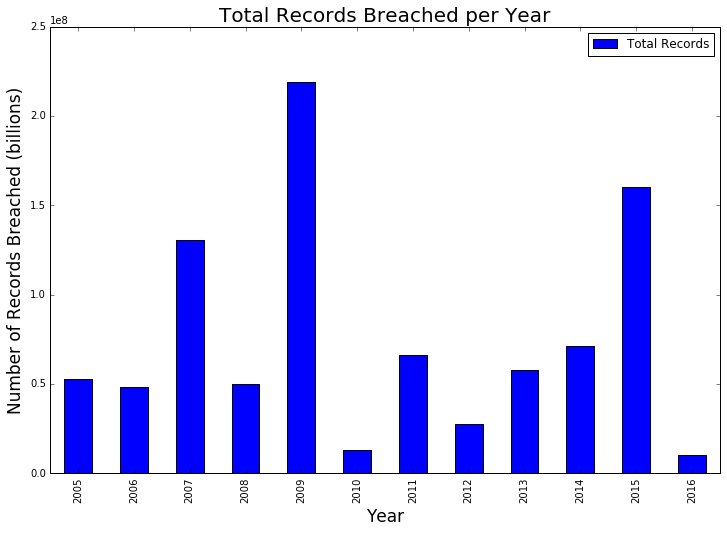

In [184]:
df3[:12].plot(kind='bar', fontsize=10, figsize=[12,8])
plt.title('Total Records Breached per Year', fontsize=20) 
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Records Breached (billions)', fontsize=17) 

In [185]:
df.head()

,Day,Month,Year,Company,City,State,Type of breach,Type of organization,Records Breached,Total Records,Description of incident
0,21,October,2009,Bullitt County Public Schools,Shepherdsville,Kentucky,DISC,EDU,676,676,A Bullitt County Public Schools \r\n ...
1,21,October,2009,Roane State Community College,Harriman,Tennessee,PORT,EDU,14783,14783,Roane State Community College \r\n ...
2,15,October,2009,Halifax Health,Daytona Beach,Florida,PORT,MED,33000,33000,A laptop computer from a Halifax \r\n ...
3,4,October,2009,Suffolk Community College,Selden,New York,DISC,EDU,300,300,Suffolk Community College has \r\n ...
4,28,September,2009,Penrose Hospital,Colorado Springs,Colorado,PHYS,MED,175,175,Officials at Penrose Hospital bel...


In [186]:
df4 = df[['State', 'Total Records']]

In [187]:
df4 = df4.groupby(['State']).sum()

In [188]:
df4.to_csv("C:\GIT\Amlin\states.csv")

In [189]:
df5 = df[['Year']]
df5['Count'] = 1

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [190]:
df5 = df5.groupby(['Year']).sum()

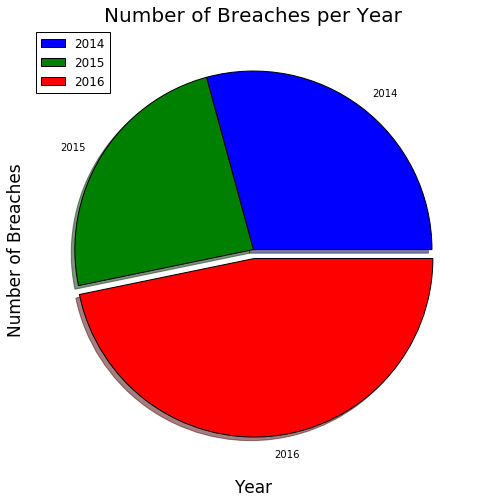

In [191]:
df5[9:12].plot(kind='pie', figsize=[8, 8], subplots=True, shadow=True, explode=[0,0,0.05])
plt.title('Number of Breaches per Year', fontsize=20) 
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Breaches', fontsize=17)
plt.legend(loc='upper left')

In [192]:
df6 = df[['Year', 'Type of breach']]
df6[''] = 1
df6 = df6.groupby(['Year', 'Type of breach']).sum()
df6.head(20)

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Year Type of breach     
2005 DISC             20
     HACK             48
     INSD             10
     PHYS              8
     PORT             38
     STAT             10
     UNKN              2
2006 CARD              3
     DISC             83
     HACK             75
     INSD             32
     PHYS             39
     PORT            186
     STAT             48
     UNKN             16
2007 CARD              2
     DISC             98
     HACK             71
     INSD             23
     PHYS             43

In [193]:
df6 = df6.unstack()
#df6.set_index(['Year', 'Type of breach'])
#pd.set_option('display.multi_sparse', True)

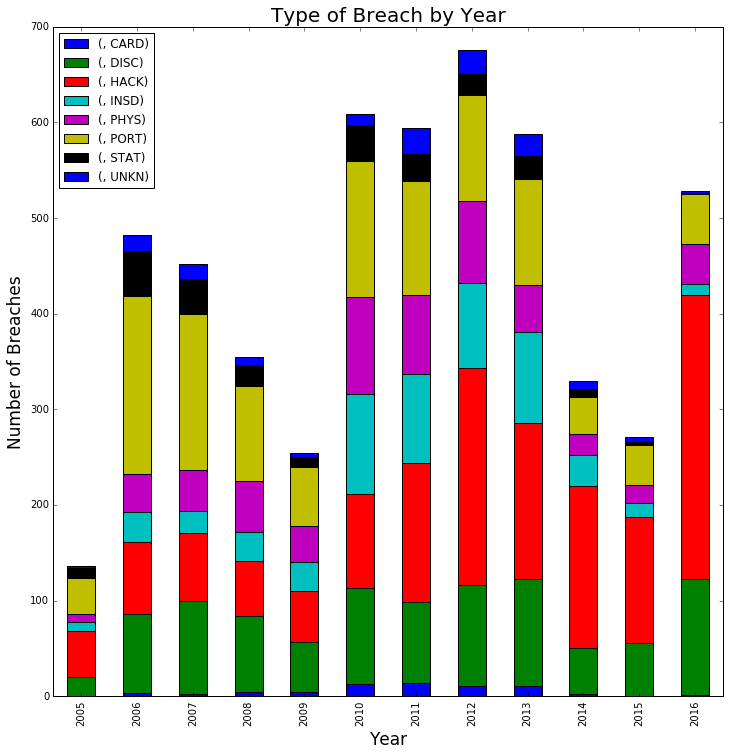

In [194]:
df6[:12].plot(kind='bar', stacked=True, figsize=[12,12])
plt.title('Type of Breach by Year', fontsize=20) 
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Breaches', fontsize=17) 
plt.legend(loc='upper left')

In [200]:
df7 = df[['Month']]
df7['Count'] = 1
df7 = df7.groupby(['Month']).sum().sort_values('Count', ascending=False)
df7.to_csv("C:\GIT\Amlin\months.csv")
df7.head()

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Count
Month,
March,481
January,460
May,460
December,459
July,452


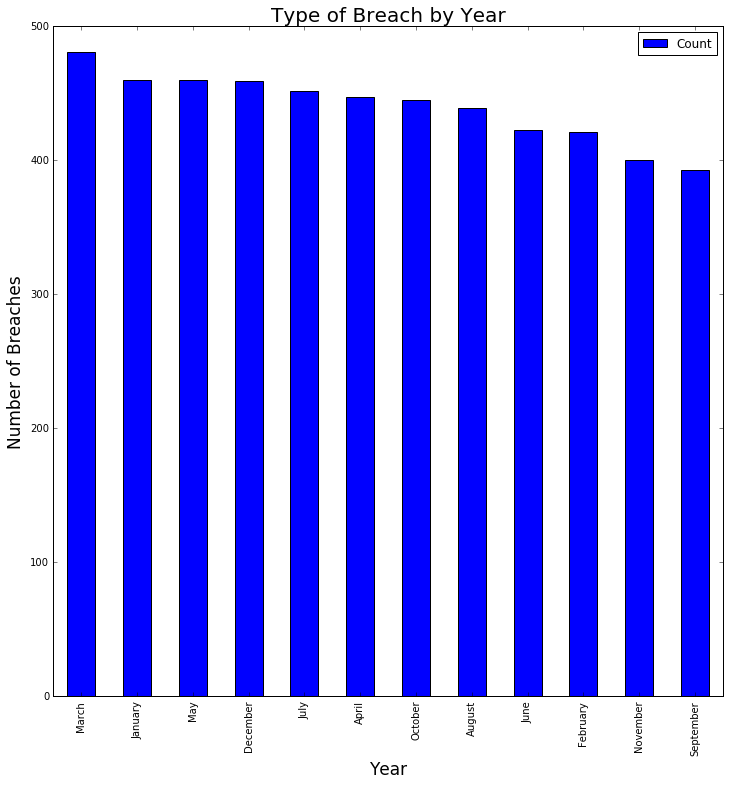

In [199]:
df7.plot(kind='bar', stacked=True, figsize=[12,12])
plt.title('Type of Breach by Year', fontsize=20) 
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Breaches', fontsize=17) 
plt.legend(loc='upper right')

In [299]:
df8 = df[['Type of organization', 'Type of breach']]
df8['Count'] = 1
g = df8.groupby(['Type of organization', 'Type of breach']).sum()
g.to_csv("C:\GIT\Amlin\organisation_breach.csv")

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [300]:
df9 = df[['State']]
df9['Count'] = 1
df9 = df9.groupby('State').sum()

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [301]:
df9.to_csv("C:\GIT\Amlin\state_count.csv")

In [302]:
df['Type of breach'].value_counts()

HACK    1537
PORT    1165
DISC     964
PHYS     583
INSD     566
STAT     249
UNKN     150
CARD      66
Name: Type of breach, dtype: int64